## < 소득과 지출 - 심정윤 >

In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import platform

### 어려웠던 점:
#### 1) 해외 데이터 존재 
#### 2) TABLE 구성 및 TABLE 연결


****
### ERD 관계도

###### 

#### 자료 출처 : 보건복지부 - 노인실태조사 (2014, 2017, 2020)

In [3]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')

*****
### 노인가구 가계 비율

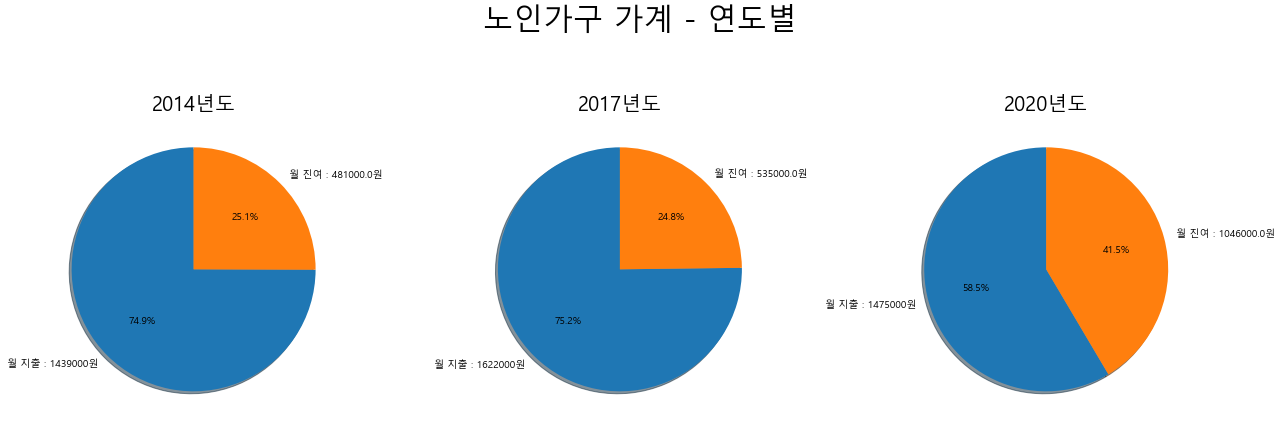

In [4]:
table_list=['total']

for table in table_list: 
    conn = pymysql.connect(host='localhost', user='root', password='0309', db = 'teamproject', charset='utf8')
    cur=conn.cursor()
    cur.execute(f'select * from elder_{table}_month')

    rows=cur.fetchall() # 모든 데이터를 가져옴

    sol_month=pd.DataFrame(rows)
    sol_month.columns=['연도_코드', '월소득','월지출','월잔여']

    cur.close()
    conn.close()

    fig, axes = plt.subplots(1, 3, figsize=(18,7), facecolor='white')
    # plt.rcParams[label.labelsize] =10

    if table == 'total':
        fig.suptitle('노인가구 가계 - 연도별', fontsize=30)
    elif table == 'sol':
            fig.suptitle('노인독거 유형 가계 - 연도별', fontsize=30)
    elif table =='two':
        fig.suptitle('노인독거 유형 가계 - 연도별', fontsize=30)

    fig.subplots_adjust(hspace=0.3, wspace=0.3)
 
    n = 0
    year_list=[2014,2017,2020]
    for i in sol_month.index:
        plt.subplot(1,3,i+1)
        plt.title(f'{year_list[i]}년도', fontsize=20)
        plt.rcParams['figure.figsize'] = [30, 20] 
        expense=f'월 지출 : {int(sol_month.iloc[i][2]*10000)}원'
        left=f'월 진여 : {sol_month.iloc[i][3]*10000}원'
        plt.pie(list(sol_month.iloc[i][2:]), labels=[expense, left],  autopct='%.1f%%', shadow=True, startangle=90)
    
    fig.tight_layout()
    plt.show()

### 경제상태 만족도

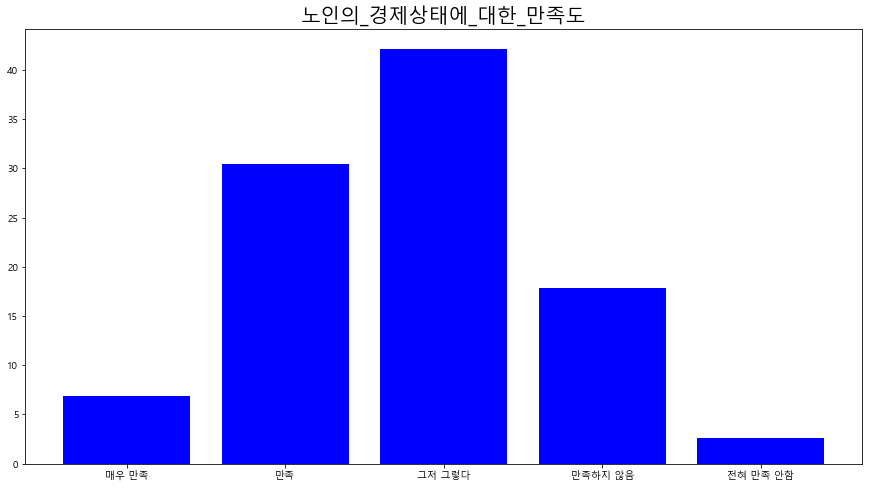

In [5]:
conn = pymysql.connect(host='localhost', user='root', password='0309', db = 'teamproject', charset='utf8')
cur=conn.cursor()
cur.execute(f'SELECT * FROM 노인의_경제상태에_대한_만족도')

rows=cur.fetchall() # 모든 데이터를 가져옴

elder_sat=pd.DataFrame(rows)
elder_sat.columns=['매우 만족','만족','그저 그렇다','만족하지 않음' ,'전혀 만족 안함']

cur.close()
conn.close()

plt.figure(figsize=(15,8))
plt.title('노인의_경제상태에_대한_만족도', fontsize=20)
plt.bar(elder_sat.columns, elder_sat.iloc[0], color='b')
plt.show()

### REASON

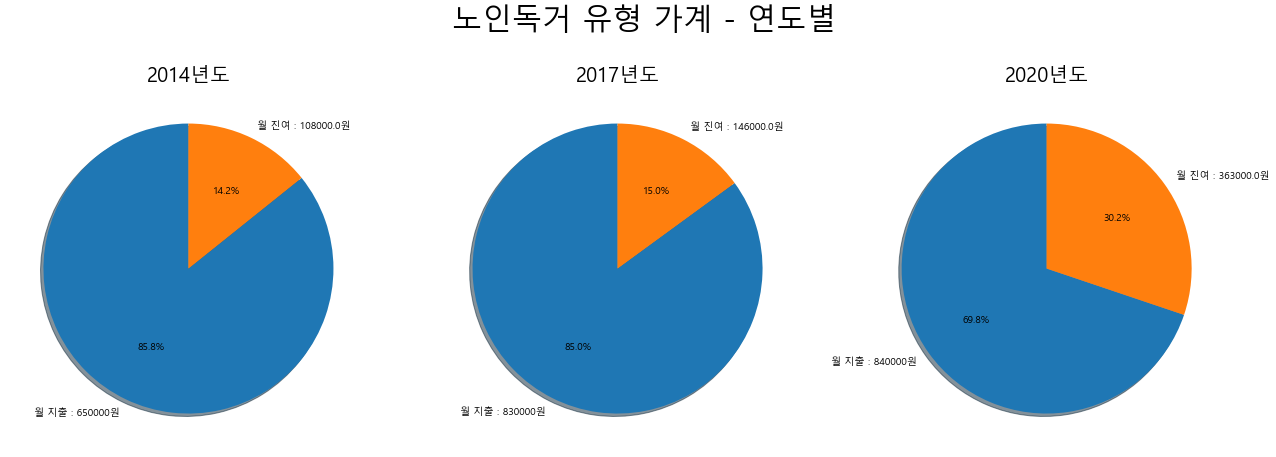

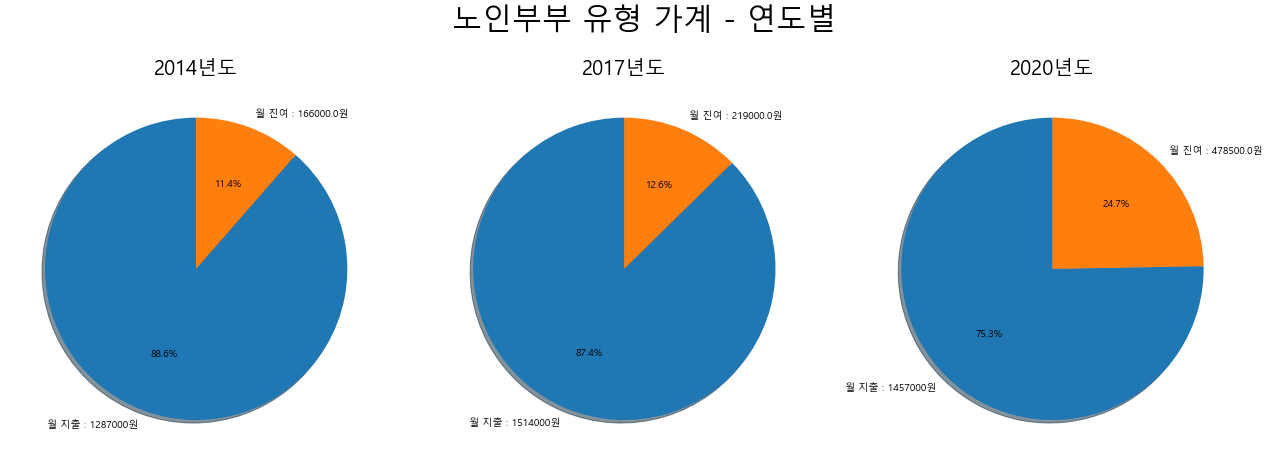

In [6]:
table_list=['sol', 'two']

for table in table_list: 
    conn = pymysql.connect(host='localhost', user='root', password='0309', db = 'teamproject', charset='utf8')
    cur=conn.cursor()
    cur.execute(f'select * from elder_{table}_month')

    rows=cur.fetchall() # 모든 데이터를 가져옴

    sol_month=pd.DataFrame(rows)
    sol_month.columns=['연도_코드', '월소득','월지출','월잔여']

    cur.close()
    conn.close()

    fig, axes = plt.subplots(1, 3, figsize=(18,7), facecolor='white')
    # plt.rcParams[label.labelsize] =10

    if table == 'total':
        fig.suptitle('노인가구 가계 - 연도별', fontsize=30)
    elif table == 'sol':
            fig.suptitle('노인독거 유형 가계 - 연도별', fontsize=30)
    elif table =='two':
        fig.suptitle('노인부부 유형 가계 - 연도별', fontsize=30)

    fig.subplots_adjust(hspace=0.3, wspace=0.3)
 
    n = 0
    year_list=[2014,2017,2020]
    for i in sol_month.index:
        plt.subplot(1,3,i+1)
        plt.title(f'{year_list[i]}년도', fontsize=20)
        plt.rcParams['figure.figsize'] = [30, 20] 
        expense=f'월 지출 : {int(sol_month.iloc[i][2]*10000)}원'
        left=f'월 진여 : {sol_month.iloc[i][3]*10000}원'
        plt.pie(list(sol_month.iloc[i][2:]), labels=[expense, left],  autopct='%.1f%%', shadow=True, startangle=90)
    
    fig.tight_layout()
    plt.show()

## 개선 방안?
# .

*******
### 결론 :
#### 1) 소외계층(독거노인, 노인부부 가구) 의 월 여유자금 부족
#### 2) 개선방안으로 연금 증액은 불가
#### 3) 스스로 해결하기를 원함 

### ---> 노인일자리 증가 및 보완